# Students:
<font color=orange>

- Zhe HUANG 22208901 AI
- Mathis
<font>

# TP3 - Compression, Prediction, Generation: Text Entropy

#### Francesco Saverio Pezzicoli, Guillaume Charpiat 

#### Credits: Vincenzo Schimmenti

### Introduction

In this TP we are interested in compressing and generating texts written in natural languages.
Given a text of length $n$, a sequence of symbols is just a vector $(x_1, . . . , x_n)$ where each $x_i$ is a symbol i.e. $x_i = a, b, c, \dots$. We can define the alphabet of possible symbols as $\mathcal{A} = \{a_1,a_2,\dots,a_M\}$ then each $x_i$ can have $M$ values.

In order to model the sequence of symbols we need a joint probability distribution for each symbol in the sequence, namely $p(X_1 = x_1, X_2 = x_2, \dots , X_n = x_n)$. If our alphabet had $M$ symbols, for modelling a sequence of length $n$ we would need $M^n$ probabilities. Thus some assumptions are required in order to reduce this dimensionality. In this case we will use two different models for $p$, the IID and the Markov Chain model.

### IID Model
The IID model assumes:

$$ p(X_1 = x_1, X_2 = x_2, \dots , X_n = x_n) = \prod_{i=1}^n p(X_i = x_i)$$

i.e. that the symbols in a sequence are independent and identically distributed. With this model we need only $M$ probabilities, one for each symbol. One can generalize and use symbols not of a single character but of multiples ones. For example using 3 characters per symbol, the symbols would be of the form $aaa,aab,...,zzz$. When using $k$ characters per symbols in an alphabet of $M$ characters, the needed probabilities would be $M^k$.


### Markov Chain Model

The Markov Chain model assume a limited range of dependence of the symbols. Indeed for an order $k$ Markov Chain:


$$p(X_i | X_{i-1},X_{i-2},\dots,X_1) = p(X_i | X_{i-1},X_{i-2},\dots,X_{i-k})$$


The meaning of the above structure is that the $i$-th symbol in the sequence depends only on the previous $k$ symbols. We add the time *invariant assumption*, meaning that the conditional probabilities do not depend on the time index $i$ i.e. $p(X_i | X_{i-1},X_{i-2},\dots,X_{i-k}) = p(X_{k+1} | X_{k},X_{k-1},\dots,X_{1})$. The most common and widely used Markov Chain is the Markov Chain of order 1:

$$p(X_i | X_{i-1},X_{i-2},\dots,X_1) = p(X_i | X_{i-1})$$

In this case the conditional probability $p(X_i|X_{i−1})$ can be expressed using $M^2$
numbers. Usually this is referred to as the *transition matrix*. Given an alphabet $\mathcal{A} = \{a_1,a_2,\dots,a_M\}$ the transition matrix can be written as: 

$$ \mathbb{M}_{kl} = p(X_i = a_k| X_{i-1} = a_l) $$

### Entropy and Cross-Entropy


- For the IID model of order 1 the entropy computation is straightforward: 
$$ H_{IID} = -\sum_{i=1}^M p(a_i) log p(a_i)$$ 
and consequently, starting from two distributions $p,q$ fitted on two different texts, the cross-entropy:
$$ CE_{IID} = -\sum_{i=1}^M p(a_i) log q(a_i)$$


- For the MC model of order 1 the entropy is defined as follows: 
$$ H_{MC} = - \sum_{kl} \pi(a_k) p(X_i = a_k| X_{i-1} = a_l) log \left(p(X_i = a_k| X_{i-1} = a_l)\right)= - \sum_{kl} \pi_k\mathbb{M}_{kl} log \mathbb{M}_{kl}$$
where $\pi$ is the stationary distribution of the Markov Chain i.e. $\pi_k = \mathbb{M}_{kl} \pi_l$. The code to compute the stationary distribution is already given.
The cross-entropy:
$$ CE_{IID} = - \sum_{kl} \pi_k\mathbb{M}_{kl} log \mathbb{M'}_{kl}$$
with $\mathbb{M}$ and $\mathbb{M'}$ are fitted on two different texts.


### Theoretical Questions: 

1) Interpret the time invariant assumption associated to our Markov chains in the contex of text generation.
The time-invariant assumption associated with Markov chains in the context of text generation means that the probability of generating a particular word in the sequence only depends on the previous N words in the sequence, and not on any specific time or position within the sequence itself. In other words, the probability distribution for generating the next word in the sequence is constant over time and does not change with each new word generated.
The probability distribution does not evolve as we generate text and there is no need for recursivity to generate text. We can simply compute $p(X_{k+1} | X_{k},X_{k-1},\dots,X_{1})$ and apply it as much as needed. It also means that the generated text has to be homogenous, in the sense that there is no way to generate text in several ways. For example, this kind of Markov chain would be completely unable to alternatively generate 10 words in spanish and 10 words in french.

2) How can we rewrite a Markov chain of higher order as a Markov chain of order 1?
To rewrite a Markov chain of higher order as a Markov chain of order 1, we need to flatten the model by treating each N-tuple of states as a single state. This is done by creating a new state space that consists of all possible N-tuples of states, and then defining a new transition matrix that captures the probability of transitioning between these N-tuples.
Sometimes a little drawing is better than a long speech. The following picture is self explanatory.
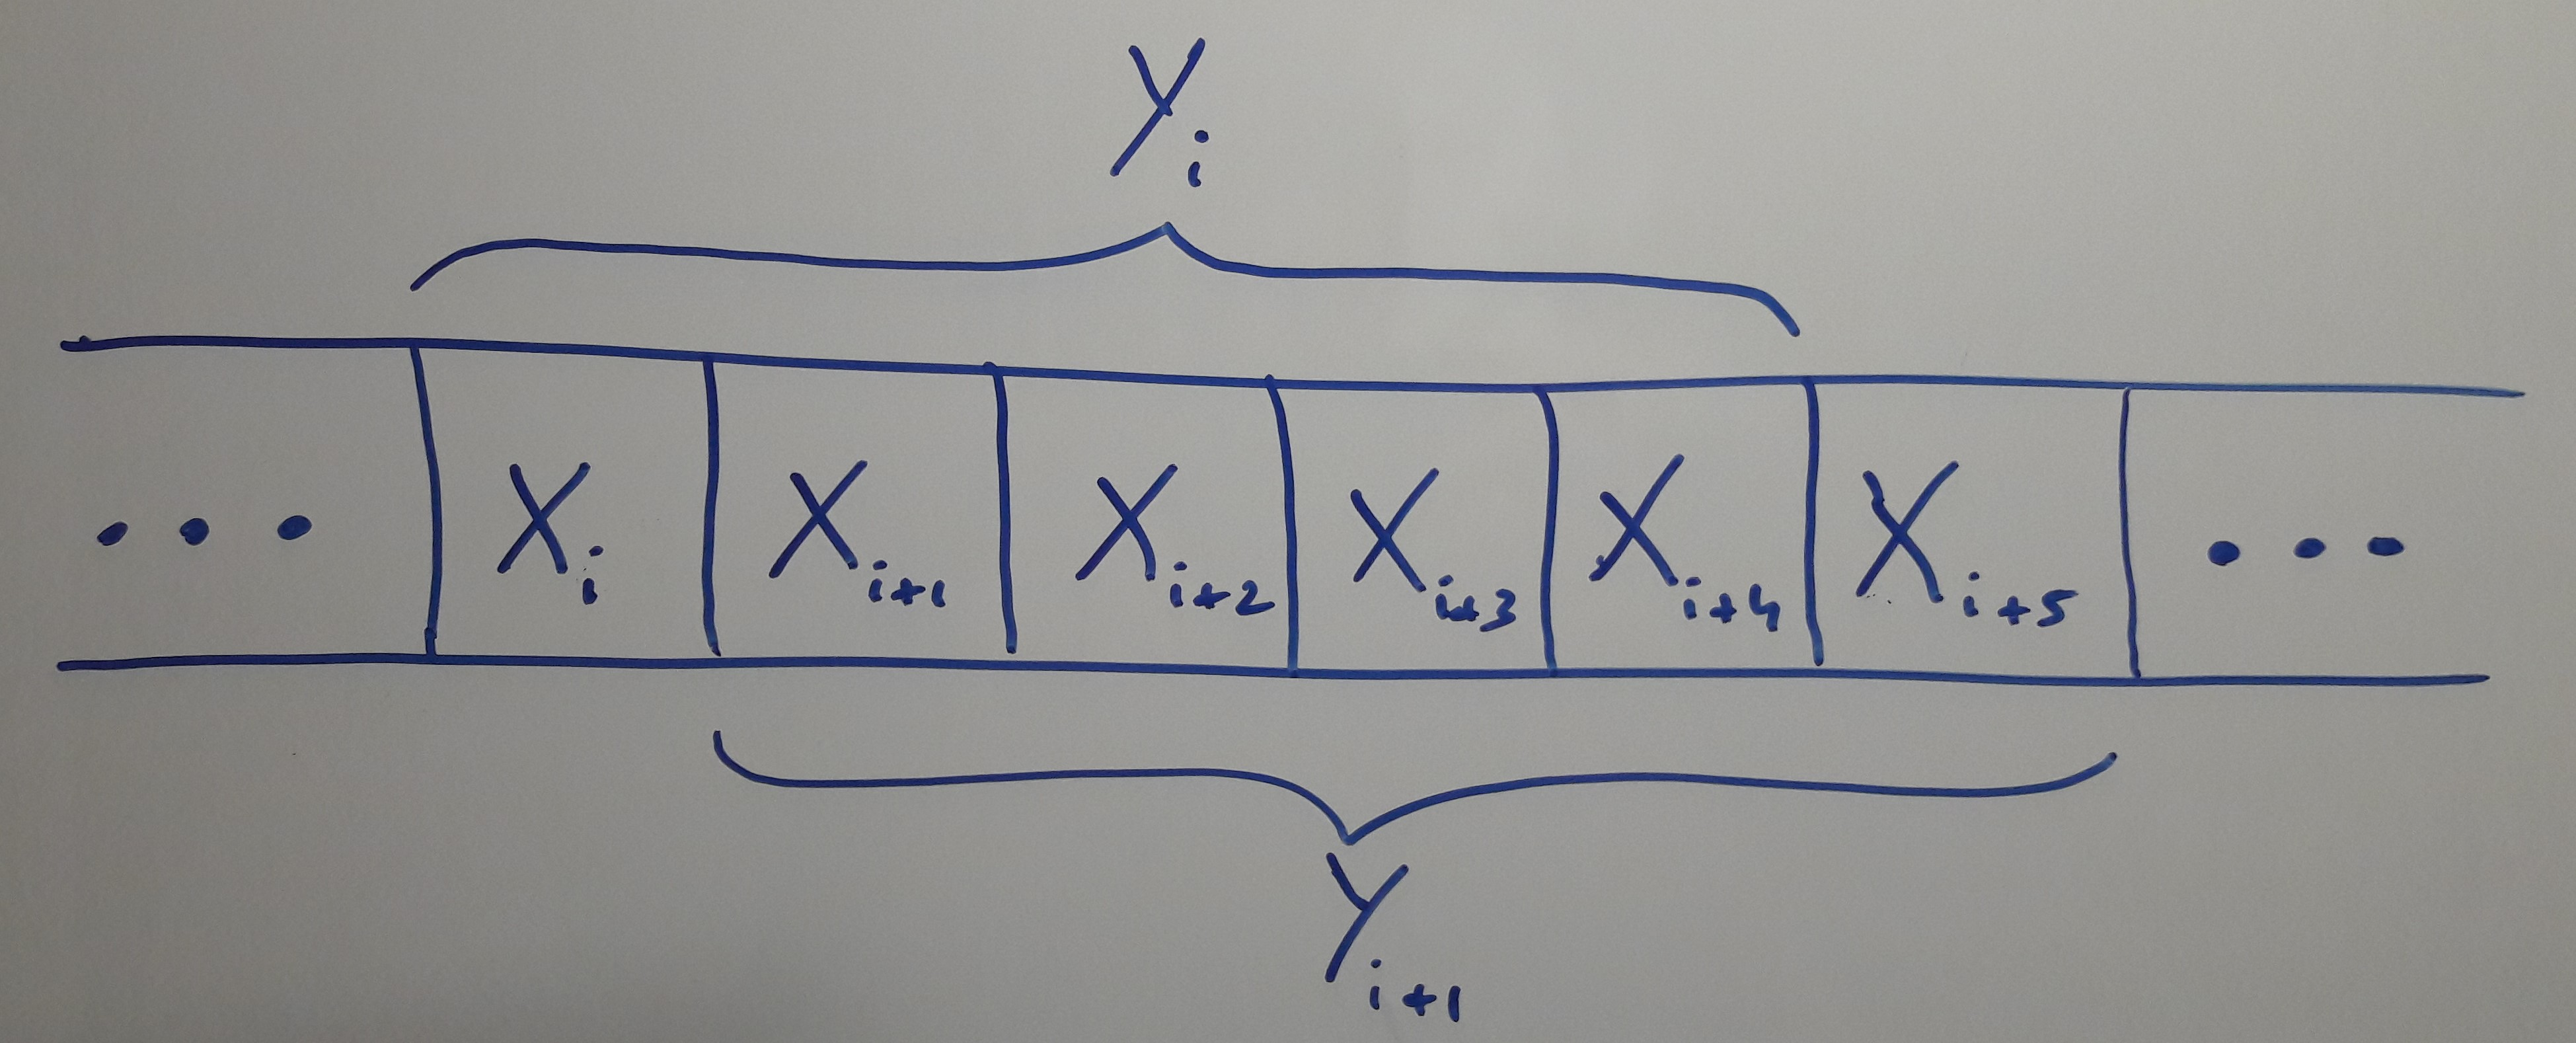
Here, to generate $X_{i+5}$, instead of computing $p(X_{i+5} | X_{i+4},X_{i+3},\dots,X_{i})$, we compute $p(Y_{i+1} | Y_{i})$ (we have to define the probability distribution so that the 4 last $Y_{i+1}$ marginal realisations stay the same as the 4 first of $Y_{i}$) and then we extract $X_{i+5}$ from $Y_{i+1}$.
In the example below, we show what the tranfert matrix should look like in a simple case. The zeros ensure that the marginal realisations stay the same between $Y_{i}$ and $Y_{i+1}$ as explained above.
![20230404_103755_2.jpg](20230404_103755_2.jpg)


3) Given a probability distribution over symbols, how to use it for generating sentences?
We can use words as sumbols. Then we define the vocabulary (the words we want to use for generating the sentences). First we choose a starting word. Then we generate the next word by randomly sampling from the probability distribution of possible words in the vocabulary given the current word. The probability distribution can be statisticaly estimated from a corpus of training sentences. We generate words in the same way until we reach a stop criterion. We add a final symbol (like a ".").

### Practical questions

In order to construct our IID and Markov Chain models we need some text. Our source will be a set of classical novels available at: https://www.lri.fr/~gcharpia/informationtheory/TP2_texts.zip

We will use the symbols in each text to learn the probabilities of each model. The alphabet we suggest for the characters to use is string.printable which is made of $\sim 100$ characters. (see below)

For both models, perform the following steps:

1) For different orders of dependencies, train the model on a novel and compute the associated entropy. What do you observe as the order increases? Explain your observations.

2) Use the other novels as test sets and compute the cross-entropy for each model trained previously. How to handle symbols (or sequences of symbols) not seen in the training set?

3) For each order of dependencies, compare the cross-entropy with the entropy. Explain and interpret the differences.

4) Choose the order of dependencies with the lowest cross-entropy and generate some sentences.

5) Train one model per novel and use the KL divergence in order to cluster the novels.


<b>Hints</b> : 

- In the MC case limit yourself to order $2$ (the computation can become quite expensive). If you have $ M \sim 100$ characters, for order $1$ you will need a $\sim 100 \times 100$ matrix, for order $2$ a $\sim 10^4 \times 10^4$ matrix.

- For the second order MC model you need to compute: $p(X_{i+1},X_{i}|X_{i},X_{i-1})$

- It is possible to implement efficiently the two models with dictionaries inPython.  For the IID model, a key of the dictionary is simply a symbol and the value is the number of occurrences of the symbol in the text. For a Markov chain, a key of the dictionary is also a symbol, but the value is a vector that contains the number of occurrences of each character of the alphabet.  Notice that a symbol may consist of one or several characters. Note also that there is no need to explicitly consider all possible symbols; the ones that are observed in the training set are sufficient.

- A low probability can be assigned to symbols not observed in the training-set.

#### Computing stationary distribution 

Here we provide you two version of the function to compute the stationary distirbution of a markov chain and show a small example

In [1]:
#direct way to find pi (can be slow)
import  numpy  as np

def Compute_stationary_distribution(P_kl):
    ## P_kl must be the transition matrix from state l to state k!
    evals , evecs = np.linalg.eig(P_kl)   
    evec1 = evecs[:,np.isclose(evals , 1)]
    evec1 = evec1 [:,0]
    pi = evec1 / evec1.sum()
    pi = pi.real #stationary  probability
    
    return pi 

#iteative way (should be faster)
def Compute_stationary_distribution_it(P_kl, n_it):
    pi = np.random.uniform(size=P_kl.shape[0]) #initial state, can be a random one!
    pi /= pi.sum()
    #print(pi,pi.sum())
    for t in range(n_it):   
        pi = np.matmul(P_kl,pi)
    
    return pi

In [2]:
##simple example of computation of stationary distribution 

n_it = 1000                                     ##remind to check that n_it is enough to reach convergence
P_kl = np.array([[0.7,0.5],[0.3,0.5]])
Compute_stationary_distribution_it(P_kl,n_it)

array([0.625, 0.375])

#### Defining the Alphabet

Example of uploading a text and filtering out characters which are not in the chosen alphabet

In [3]:
import  string

def import_text(file_name):
    lines = []
    with  open(file_name , encoding='UTF8') as f:
        lines = f.readlines ()
        text = '\n'.join(lines)
        printable = set(string.printable)
        text = ''.join(filter(lambda x: x in printable , text))     
    return text

text = import_text('./texts/Alighieri.txt')

Given a distribution of reference 'd_ref' computed during training and a distribution 'd' computed for testing, this function restrict 'd' to 'd_ref''s values. That is, if a key is in 'd' but not in 'd_ref', then it is ignored and if a key is in 'd_ref' but not in 'd', then the key is added to 'd' with value v ; where v is equal to 1 minus the sum of 'd''s values that have a key that belongs to 'd_ref', divided the number of keys from 'd_ref' that does not belong to 'd'.


More formaly, let $\delta : K_d \mapsto V_d$ be a function that represent 'd' with $K_d$ the set of its keys and $V_d$ the set of its values.
$v = \frac{1-\sum_{k\in K_{d_{ref}}}{\delta(k)}}{\text{Card}\{k \in K_{d_{ref}} | \delta(k) = 0\}}$


We implement this in 'restrict_dict'

In [4]:
def restrict_dict (d_ref,d) :
    d_restricted = {}
    n = len(d_ref.keys())
    null_counter = 0
    for key in d_ref.keys():
        if key in d:
            d_restricted[key] = d[key]
        else:
            d_restricted[key] = 0
            null_counter += 1
    sum_probas = sum(list(d_restricted.values()))
    if null_counter != 0 :
        proba = (1-sum_probas)/null_counter
        for key,v in d_restricted.items() :
            if v == 0 :
                d_restricted[key] = proba
    return d_restricted

#### IID - MODEL

In [5]:
import os

In [6]:
import numpy as np
import math
from collections import Counter 

class IIDModel:
    """An interface for the text model"""
    def __init__(self, order=1):
        print("Creation of the model of order ", order)
        self.order = order
        
    def process(self,text,training=False):
        if training :
            self.d = {}
        else :
            self.p = {}
        s_list = [text[i*self.order:(i+1)*self.order] for i in range(int(len(text)/self.order))]
        incr = 1/(len(s_list)-1)
        for s in s_list[:-1] :
            if training :
                try :
                    self.d[s] += incr
                except :
                    self.d[s] = incr
            else :
                try :
                    self.p[s] += incr
                except :
                    self.p[s] = incr

    def getEntropy(self):
        d = np.array(list(self.d.values()))
        return -np.sum(d*np.log2(d))

    def getCrossEntropy(self, text):
        self.process(text)
        P = np.array(list((restrict_dict(self.d,self.p)).values()))
        d = np.array(list(self.d.values()))
        cross_entropy = -np.sum(P*np.log2(d))
        return cross_entropy

    def generate(self, length):
        text = ''
        for i in range(length):
            text += np.random.choice(list(self.d.keys()), p=list(self.d.values()))
        return text

In [7]:
path = "./texts/"
for order in range (1,6) :
    # define and train the model
    model = IIDModel(order)
    model.process(text,training=True)
    # generate 10 symbols
    print("10 generated symbols : ", model.generate(10))
    # compute entropy
    entropy = model.getEntropy()
    print("Model's entropy is : ", entropy)
    print("Number of symbols seen during training : ", len(list(model.d.values())))
    # compute cross-entropies
    for t in os.listdir(path) :
        if t != "Alighieri.txt" :
            ce = model.getCrossEntropy(import_text(path+t))
            print("Cross entropy with ", t, " : ", ce)
    print("\r")

Creation of the model of order  1
10 generated symbols :  tesroOf ho
Model's entropy is :  4.189857332102942
Number of symbols seen during training :  57
Cross entropy with  Dostoevsky.txt  :  4.58097067288715
Cross entropy with  Goethe.txt  :  4.59801231377949
Cross entropy with  Hamlet.txt  :  5.0145475751810915

Creation of the model of order  2
10 generated symbols :    esa i 

ntr ceabi 
Model's entropy is :  7.362241327332685
Number of symbols seen during training :  680
Cross entropy with  Dostoevsky.txt  :  10.03762383019032
Cross entropy with  Goethe.txt  :  9.70077524008897
Cross entropy with  Hamlet.txt  :  9.782774104395514

Creation of the model of order  3
10 generated symbols :  stiitoa.


 to  a sontizhe ter
Model's entropy is :  9.955311808095276
Number of symbols seen during training :  4439
Cross entropy with  Dostoevsky.txt  :  13.448843746547865
Cross entropy with  Goethe.txt  :  13.247160840922248
Cross entropy with  Hamlet.txt  :  13.236076015575023

Creation of 

We observe that entropy increases as the order increases. Indeed, as the order increases, they are more and more symbols to considere. That is, the model distribution is a uniform law of increasingly large parameter's value. But if, for any $n \in \mathbb{N}$, we let $U_n$ be a random variable following a uniform law of parameter $n$, then the function $n\in \mathbb{N} \mapsto H(U_n)$ is increasing.

We observe that as the order increases, the cross-entropy gets bigger as compared to the entropy. It is due to an analogous  reason : as we increase the order, they is a wider variety of symbols (increases exponentialy) and the test texts are more likely to have symbols never seen during training. So the normalisation in the formula of cross-entropy is not enough to balance this exponential increase.

In [8]:
model1 = IIDModel(4)
model1.process(import_text('./texts/Alighieri.txt'),training=True)

model2 = IIDModel(4)
model2.process(import_text('./texts/Dostoevsky.txt'),training=True)

model3 = IIDModel(4)
model3.process(import_text('./texts/Goethe.txt'),training=True)

model4 = IIDModel(4)
model4.process(import_text('./texts/Hamlet.txt'),training=True)

models = [model1,model2,model3,model4]

Creation of the model of order  4
Creation of the model of order  4
Creation of the model of order  4
Creation of the model of order  4


In [9]:
##clustering texts 

def KL_divergence(dist1,dist2): 
    return np.sum(dist1*np.log2(dist1/dist2))


In [10]:
for i,m1 in enumerate(models) :
    d1 = np.array(list(m1.d.values()))
    for j,m2 in enumerate(models) :
        d2 = np.array(list(restrict_dict(m1.d,m2.d).values()))
        kl = KL_divergence(d1,d2)
        if kl != 0 :
            print("KL divergence of model", i+1, "and  ", j+1, " : ", kl)

KL divergence of model 1 and   2  :  2.199653202116152
KL divergence of model 1 and   3  :  1.725876459436968
KL divergence of model 1 and   4  :  1.9658429794413492
KL divergence of model 2 and   1  :  2.190732251970843
KL divergence of model 2 and   3  :  2.1021798833445593
KL divergence of model 2 and   4  :  2.064573925833327
KL divergence of model 3 and   1  :  1.737422058909394
KL divergence of model 3 and   2  :  2.115541710346117
KL divergence of model 3 and   4  :  0.8858104481333421
KL divergence of model 4 and   1  :  1.5733116752330185
KL divergence of model 4 and   2  :  1.8439108507729722
KL divergence of model 4 and   3  :  0.5728952782714057


#### MARKOV CHAIN - MODEL

In [11]:
import math
import numpy as np
import random

class MarkovModel:
    """A text model based on a Markov chain"""
    
    def __init__(self, order=1):
        print("Creation of the model of order ", order)
        self.order = order
        self.alphabet = set()
        self.model = {} # for order 1
        self.model2 = {} # for order 2
    
    def process(self, text):
        # create alphabet
        self.alphabet = set(text)
        
        # create order 1 model
        self.model = {}
        for c in text:
            if c in self.model:
                self.model[c] += 1
            else:
                self.model[c] = 1
                
        # create order 2 model
        self.model2 = {}
        for i in range(len(text) - self.order):
            char_sequence = text[i:i+self.order]
            next_char = text[i+self.order]
            if char_sequence in self.model2:
                if next_char in self.model2[char_sequence]:
                    self.model2[char_sequence][next_char] += 1
                else:
                    self.model2[char_sequence][next_char] = 1
            else:
                self.model2[char_sequence] = {next_char: 1}
        
        # convert counts to probabilities
        for c in self.model:
            self.model[c] /= len(text)
        for seq in self.model2:
            total_count = sum(self.model2[seq].values())
            for c in self.model2[seq]:
                self.model2[seq][c] /= total_count
    
    def getEntropy(self):
        entropy = 0
        for c in self.model:
            probability = self.model[c]
            entropy -= probability * math.log2(probability)
        return entropy
    
    def getCrossEntropy(self, text):
        cross_entropy = 0
        for i in range(len(text) - self.order):
            seq = text[i:i+self.order]
            c = text[i+self.order]
            if self.order == 1:
                if seq in self.model:
                    probability = self.model[seq]
                else:
                    probability = 1 / len(self.alphabet)
            elif self.order == 2:
                if seq in self.model2 and c in self.model2[seq]:
                    probability = self.model2[seq][c]
                elif seq in self.model2:
                    probability = 1 / (sum(self.model2[seq].values()) + len(self.alphabet))
                else:
                    probability = 1 / len(self.alphabet) ** 2
            cross_entropy -= math.log2(probability)
        return cross_entropy / (len(text) - self.order)
    
    def generate(self, length):
        text = ""
        if self.order == 1:
            for i in range(length):
                options = list(self.model.keys())
                weights = list(self.model.values())
                c = random.choices(options, weights=weights)[0]
                text += c
        elif self.order == 2:
            seq = random.choices(list(self.model2.keys()))[0]
            text += seq
            for i in range(length - self.order):
                if seq in self.model2:
                    options = list(self.model2[seq].keys())
                    weights = list(self.model2[seq].values())
                else:
                    options = list(self.alphabet)
                    weights = np.ones(len(options))
                c = random.choices(options, weights=weights)[0]
                text += c
                seq = text[-self.order:]
        return text

In [12]:
path = "./texts/"
text = import_text('./texts/Alighieri.txt')

for order in range(1,3):
    # define and train the model
    model = MarkovModel(order)
    model.process(text)
    # generate a text of length 10
    print("Let us generate a text of length 10:\n", model.generate(10))
    # compute entropy
    print("Model's entropy is: ", model.getEntropy())
    # compute cross-entropies
    for t in os.listdir(path) :
        if t != "Alighieri.txt" :
            ce = model.getCrossEntropy(import_text(path+t))
            print("Cross entropy with ", t, " : ", ce)
    print("\r")

Creation of the model of order  1
Let us generate a text of length 10:
   iuii l  
Model's entropy is:  4.18985672855961
Cross entropy with  Dostoevsky.txt  :  4.803301264665158
Cross entropy with  Goethe.txt  :  4.786569814303776
Cross entropy with  Hamlet.txt  :  4.857170149456527

Creation of the model of order  2
Let us generate a text of length 10:
 ! e che ch
Model's entropy is:  4.18985672855961
Cross entropy with  Dostoevsky.txt  :  5.676563806743194
Cross entropy with  Goethe.txt  :  5.521362130571876
Cross entropy with  Hamlet.txt  :  5.381239473052259



We observe that entropy remains unchanged as the order increases.  

That is because: The entropy is a measure of randomness or unpredictability, increasing the order of the model should not affect the entropy, as the amount of information content or randomness in the text remains the same. In other words, the entropy measures the inherent randomness in the text, which is not affected by the order of the Markov model used to model it.

We observe that as the order increases, the cross-entropy gets bigger as compared to the entropy.  

That is because: As the order of the Markov model increases, the model becomes more complex and more accurate at predicting the next character in the text. When calculating cross-entropy, we are comparing the probability distribution generated by the model to the true probability distribution of the text. As the order increases, the true probability distribution becomes more complex and more difficult to model accurately. As the model becomes more complex, it is more likely to overfit to the training data and perform worse on new, unseen data, leading to a higher cross-entropy.

### Train one model per novel and use the KL divergence in order to cluster the novels.

In [13]:
Texts = [import_text('./texts/Alighieri.txt'), import_text('./texts/Dostoevsky.txt'),
        import_text('./texts/Goethe.txt'), import_text('./texts/Hamlet.txt')]

model1 = MarkovModel(order=1)
model1.process(Texts[0])

model2 = MarkovModel(order=1)
model2.process(Texts[1])

model3 = MarkovModel(order=1)
model3.process(Texts[2])

model4 = MarkovModel(order=1)
model4.process(Texts[3])

models = [model1,model2,model3,model4]

Creation of the model of order  1
Creation of the model of order  1
Creation of the model of order  1
Creation of the model of order  1


In [14]:
kl_divergences = np.zeros((len(models), len(models)))

for i in range(len(models)):
    for j in range(len(models)):
        model_i = models[i]
        model_j = models[j]
        cross_entropy = model_i.getCrossEntropy(Texts[j])
        kl_divergences[i, j] = KL_divergence(model_i.getEntropy(), cross_entropy)

print(kl_divergences)


[[-8.70772079e-07 -8.25927124e-01 -8.04834774e-01 -8.93340778e-01]
 [ 1.60286036e-01  2.43675377e-07 -4.57462868e-01 -3.40772188e-01]
 [ 1.04244455e-01 -2.00524612e-01 -6.83307597e-06 -7.17073103e-02]
 [ 7.27907333e-02 -2.65989673e-01 -4.86681796e-02 -3.10012844e-06]]


In [15]:
from sklearn.cluster import KMeans
import numpy as np

# set the number of clusters
n_clusters = 2

# use k-means clustering to group the models based on their KL divergences
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(kl_divergences)

# print the labels assigned to each model by k-means clustering
print(kmeans.labels_)


[0 1 1 1]


The clustering algorithm has grouped model2 together with model3 and model4, as they have similar Markov chain structures compared to model1.   
In other words: Dostoevsky, Goethe and Hamlet are clustered together.